## The Perceptron for linear classification

First a short note on linearity (because I has to struggle with this a lot):

**A function is considered linear if it satisfies two main properties**:

Additivity: $f(x,y) = f(x) + f(y)$
Homogenity: $f(a * x) = a * f(x)$

These are the exact definition how a linear map between two vector spaces is defined.
Maybe that's why it is called a LINEAR map.

**Linear Transformations (Linear Maps)**:

For Example $f: \mathbb{R}^N \to \mathbb{R}, \quad f(x_1, x_2, \dots, x_N) = y$

From 3Blue1Brown: "If you take a line of evenly spaced dots from the input space and perform a linear transformation on that line
the output on the Number line (output space) are still evenly spaced. If this is not the case the transformation is non-linear."

More formally above stated characteristics hold.

So generally speaking a linear transformation "preserves the structure of the Vector Space" (A Programmers Introduction to Mathematics, Jeremy Kun)

# Now let's go to the perceptron algorithm:

We want to find a function (linear map!!!) so we can devide the Input space (the data) into two halfspaces because it is a binary classification.

**Half-Spaces** (definition taken from Wikipedia):
More generally, a half-space is either of the two parts into which a hyperplane divides an affine space. That is, the points that are not incident to the hyperplane are partitioned into two convex sets (i.e., half-spaces), such that any subspace connecting a point in one set to a point in the other must intersect the hyperplane.

To vizualize a convex set:

<img src="images/Convex_Set.png" alt="Convex Set" width="300"/>


Overview of the perceptron:

<img src="images/perceptron.png" alt="Convex Set" width="700"/>


The goal here is to learn a 1 by N+1  matrix to that performs a linear transformation of the input vector $\mathbb{R}^N$ to the correct halfspace that gets defined by the 
parameters (w, b). 

For a more "functual" definition out algorithm wants to find a function y that transforms a vector onto ${-1,1}$
where f is the nonlinear activation function phi is the input vector and w our matrix (Definition taken from Bishop):
$$
y(x) = f(w^T \varphi(x))
$$


In [8]:
# lets define some data points these datapoints will come from R^2
x = [1, 2, 3, 1, 3,   7,8, 9, 8, 7]
y = [1,2, 3, 1.5, 1,   8, 7, 9, 8, 7]

data = list(zip(x, y))
print(data)

[(1, 1), (2, 2), (3, 3), (1, 1.5), (3, 1), (7, 8), (8, 7), (9, 9), (8, 8), (7, 7)]


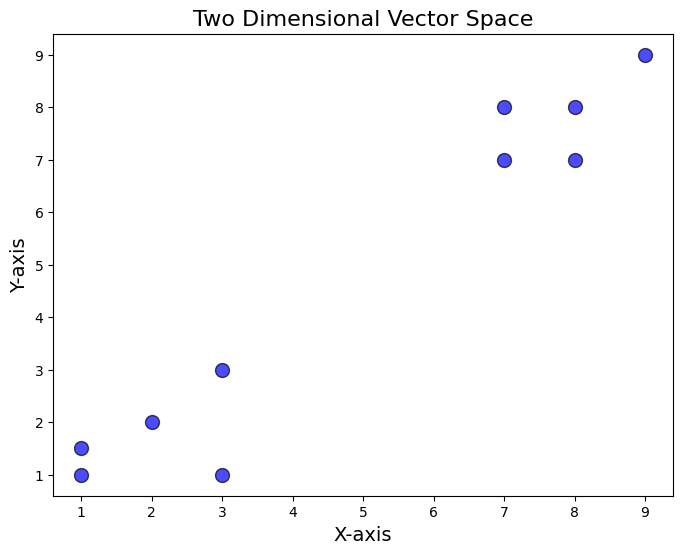

In [9]:
# lets vizualize the data
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', s=100, alpha=0.7, edgecolors='black')

# Add titles and labels
plt.title('Two Dimensional Vector Space', fontsize=16)
plt.xlabel('X-axis', fontsize=14)
plt.ylabel('Y-axis', fontsize=14)

# Show the plot
plt.show()


We can see that this is clearly linearly seperable. Hence we can find a function that devides the Input space into two convex sets.
Now let's actually write the algorithm:

In [10]:
# perceptron algorithm after Rosenblatt (1958)

# labeling of the data because it is a SUPERVISED Algorithm
labeled_data = []
for idx, (x, y) in enumerate(data):
     if x + y > 10:
          labeled_data.append([x, y, 1])
     else:
          labeled_data.append( [x, y, -1])
     

print(labeled_data)

[[1, 1, -1], [2, 2, -1], [3, 3, -1], [1, 1.5, -1], [3, 1, -1], [7, 8, 1], [8, 7, 1], [9, 9, 1], [8, 8, 1], [7, 7, 1]]


we are gonna now write the following Algorithm:

<img src="images/Algorithm.png" alt="Convex Set" width="600"/>

The goal of this algorithm is to find a vector (one dimensional Matrix) w such that $$W^\top \phi(x_n) > 0$$ for tuples in Class one
and $$W^\top \phi(x_n) < 0$$ in tuples for Class Two. We will denote these two classes as 1 and -1.

Now for both classes: $$W^\top \phi(x_n) t_n > 0$$

We define the Perception Criterion as :

$$E_P(w) = - \sum_{n \in M} w^\top \phi_n t_n$$







In [1]:

def activation(input) -> int:
     if input >= 0:
          return 1
     else:
          return -1

# this performs the linear transformation for the data given the Linear map and trandform it (numpy.dot() ) is the common interface for this)
def classify(parameters, data) -> int:
     linear_combination = 0
     for x in range( len(parameters)):
          linear_combination += parameters[x] * data[x]
     
     # adding bias on top
     #linear_combination = linear_combination + parameters[0]
     return activation(linear_combination)
        

def gradient_descent(learning_rate, data, tn, old_params):
     new_params = []

     for x in range(len(data)):
          new_params.append(old_params[x] + (learning_rate * data[x] * tn))
     return new_params


def perceptron_algorithm(learning_rate, start_vector : list)-> list[float]:
     print(f"Starting Perception Algorithm with parameters:  {start_vector} and  learning rate: {learning_rate}")

     number_of_tuples = len(labeled_data)
     correctly_classified = 0
     iteration = 0
     parameters = start_vector.copy()

     while correctly_classified < number_of_tuples:
          correctly_classified = 0
          for index, (x1, x2, y) in enumerate(labeled_data):
               # we put an
               class_prediction = classify(parameters, [0, x1,x2])
               if class_prediction == y:
                    # correctly classified
                    correctly_classified +=1
                    continue
               else: # perform stochastic gradient decent
                    parameters = gradient_descent(learning_rate, [ x1, x2], y)
                    # go into the next interation directly
          iteration += 1
          print(f"After {iteration} we have {correctly_classified} correctly classified from {number_of_tuples} datapoints")
     
     return parameters




perceptron_algorithm(0.2, [ 1,1])
               


     





Starting Perception Algorithm with parameters:  [1, 1] and  learning rate: 0.2


NameError: name 'labeled_data' is not defined